In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
images = []
labels = []
path = 'data'
dir_list = os.listdir(path)
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = os.listdir(dir)
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (64,64))
        img = np.array(img, dtype=np.float32)
        img = img/255
        images.append(img)
        labels.append(i)

In [4]:
X = np.array(images)
len(X)

20628

In [5]:
y = np.array(labels)
len(y)

20628

In [6]:
#Encode_data
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
X_sh, y_sh = shuffle(X, y, random_state=42)

## Model_train

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

Epoch 1/10
661/661 [==============================] - 26s 38ms/step - loss: 0.7096 - accuracy: 0.8067 - val_loss: 0.2688 - val_accuracy: 0.9215
Epoch 2/10
661/661 [==============================] - 26s 39ms/step - loss: 0.1889 - accuracy: 0.9413 - val_loss: 0.2034 - val_accuracy: 0.9421
Epoch 3/10
661/661 [==============================] - 25s 38ms/step - loss: 0.1194 - accuracy: 0.9590 - val_loss: 0.1832 - val_accuracy: 0.9452
Epoch 4/10
661/661 [==============================] - 26s 40ms/step - loss: 0.1018 - accuracy: 0.9630 - val_loss: 0.1797 - val_accuracy: 0.9460
Epoch 5/10
661/661 [==============================] - 26s 40ms/step - loss: 0.0839 - accuracy: 0.9689 - val_loss: 0.1939 - val_accuracy: 0.9399
Epoch 6/10
661/661 [==============================] - 26s 39ms/step - loss: 0.0721 - accuracy: 0.9730 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 7/10
661/661 [==============================] - 26s 40ms/step - loss: 0.0689 - accuracy: 0.9737 - val_loss: 0.1724 - val_accuracy:

## Model_validation:

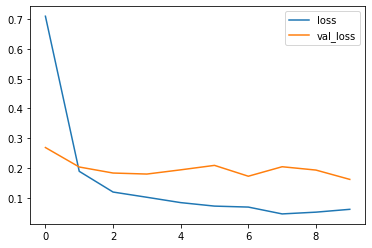

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [13]:
test_images = []
test_labels = []
path = 'testing_data'
dir_list = os.listdir(path)
for i in dir_list:
    dir = os.path.join(path, i)
    file_list = os.listdir(dir)
    for j in file_list:
        files = os.path.join(dir, j)
        img = cv2.imread(files)
        img = cv2.resize(img, (64,64))
        img = np.array(img, dtype=np.float32)
        img = img/255
        test_images.append(img)
        test_labels.append(i)

In [14]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [15]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 11ms/step - loss: 0.0336 - accuracy: 0.9851


In [17]:
print("Loss:", test_loss)
print("Accuracy:", test_accuracy)

Loss: 0.03360731154680252
Accuracy: 0.9851190447807312


32/32 [==============================] - 0s 11ms/step


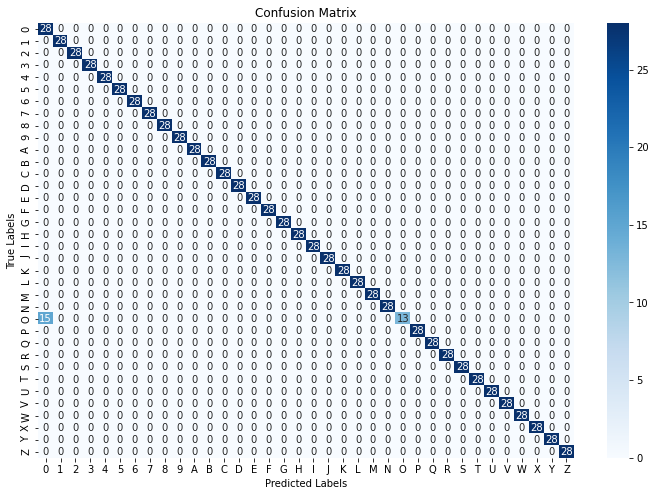

In [28]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
class_names = le.classes_

In [20]:
np.save('class_names.npy', class_names)
model.save("OCR_model.keras")